In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np



In [45]:
kmeans_df = pd.read_csv('kmeans.csv')
kmeans_df.describe()

,id,zip,latitude,longitude
count,118.000000,118.000000,118.000000,118.000000
mean,59.500000,12757.703390,42.115607,-75.472856
std,34.207699,1435.146476,1.119679,2.065206
min,1.000000,10466.000000,40.633245,-79.391760
25%,30.250000,11386.750000,40.939720,-77.394227
50%,59.500000,12933.500000,42.168893,-74.138071
75%,88.750000,14048.000000,42.972834,-73.779374
max,118.000000,14883.000000,44.964539,-73.047570


1.Mean , median , mode

In [46]:
print("Mean:\n", kmeans_df.mean(numeric_only=True))
print("Median:\n", kmeans_df.median(numeric_only=True))
print("Standard Deviation:\n", kmeans_df.std(numeric_only=True))

Mean:
 id              59.500000
zip          12757.703390
latitude        42.115607
longitude      -75.472856
dtype: float64
Median:
 id              59.500000
zip          12933.500000
latitude        42.168893
longitude      -74.138071
dtype: float64
Standard Deviation:
 id             34.207699
zip          1435.146476
latitude        1.119679
longitude       2.065206
dtype: float64


2.Plots

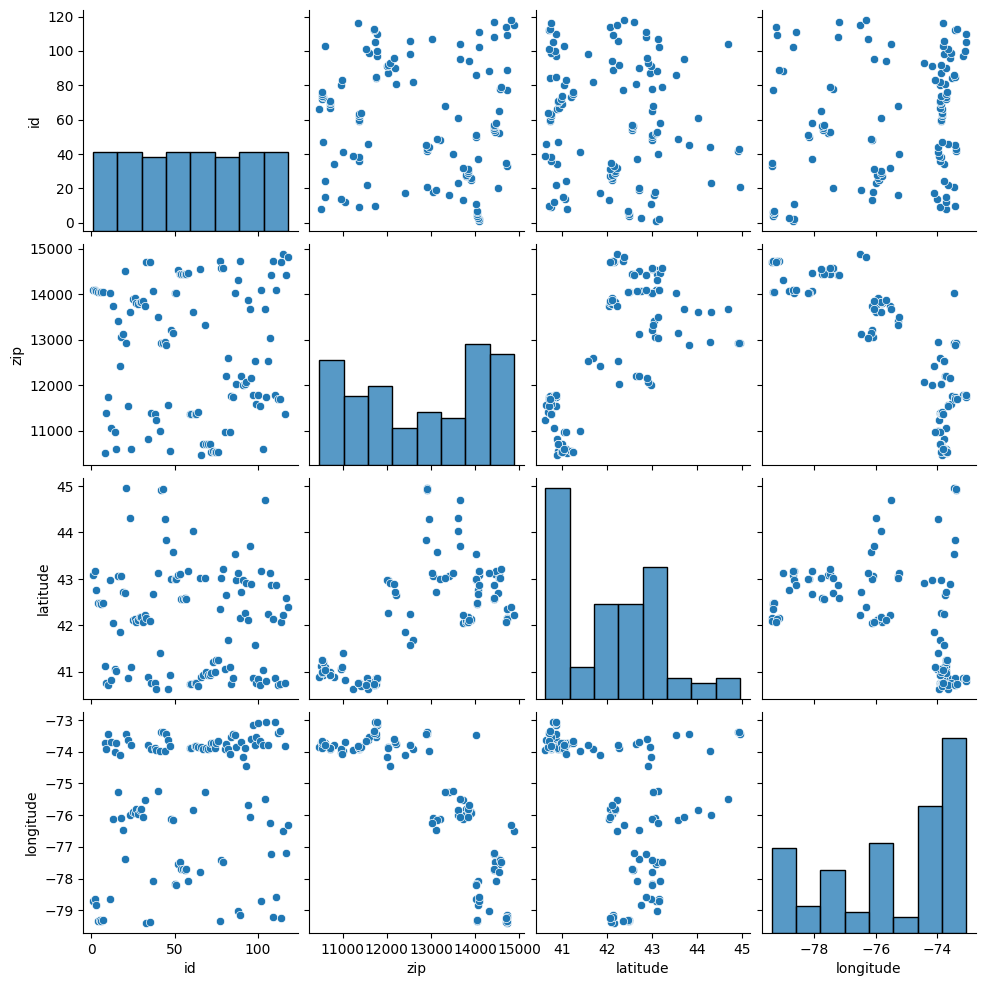

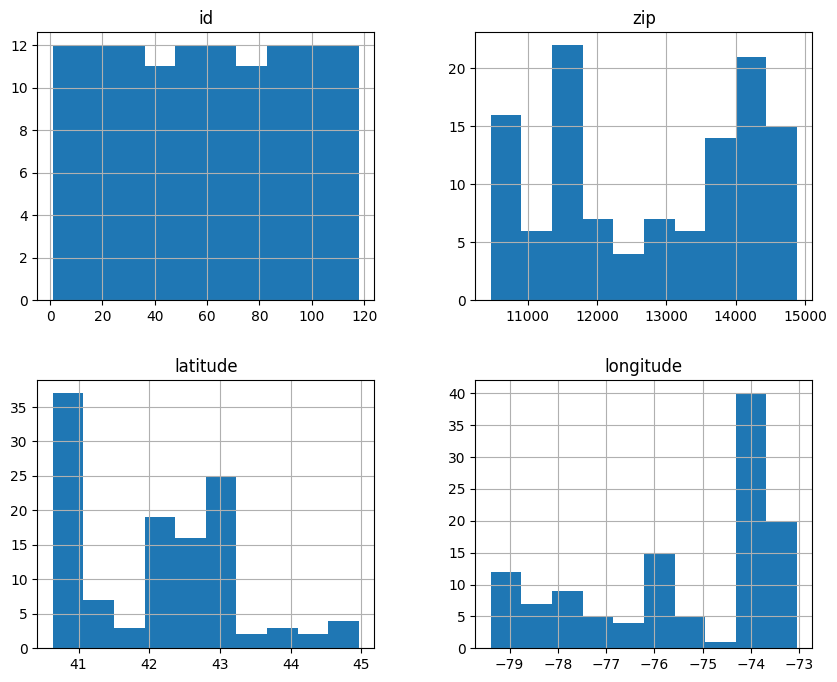

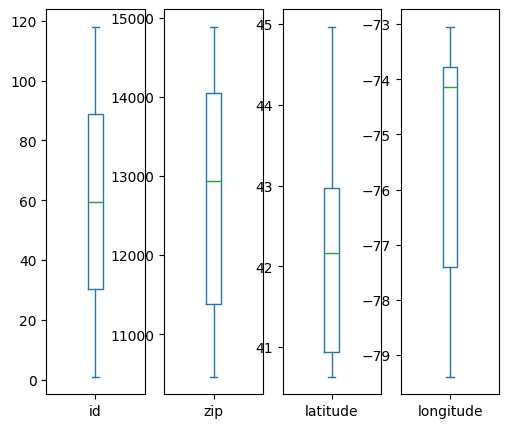

In [47]:
sns.pairplot(kmeans_df)
plt.show()

kmeans_df.hist(figsize=(10,8))
plt.show()

kmeans_df.plot(kind='box', subplots=True, layout=(1,len(kmeans_df.columns)), figsize=(15,5))
plt.show()

3.K-means Algo with five clusters

In [48]:
coords = kmeans_df[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(coords)
kmeans_df['Cluster'] = kmeans.labels_

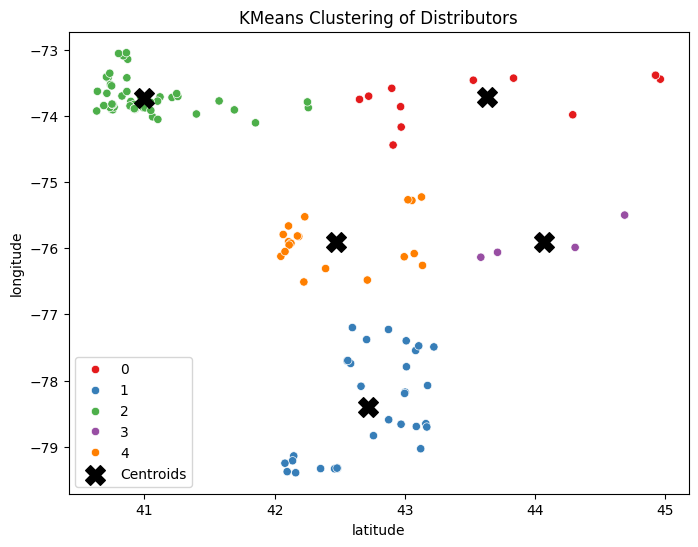

In [49]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='latitude', y='longitude', hue='Cluster', data=kmeans_df, palette='Set1')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', marker='X', label='Centroids')
plt.title('KMeans Clustering of Distributors')
plt.legend()
plt.show()

4.Elbow Method

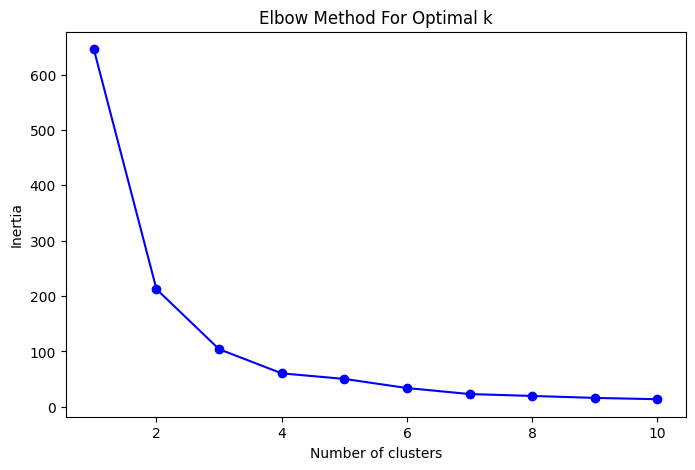

In [50]:
inertia = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(coords)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

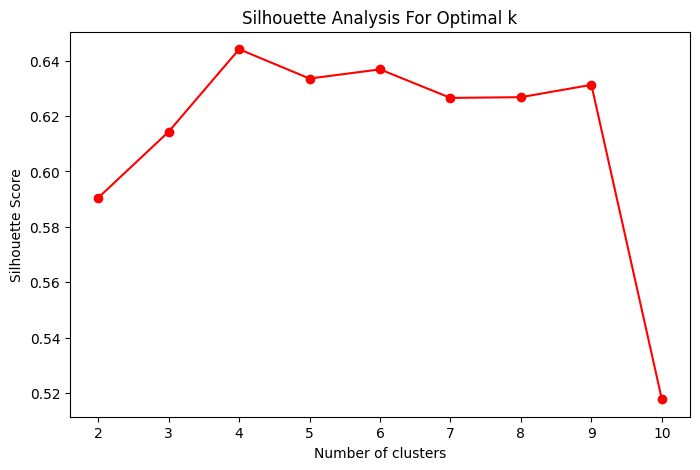

In [52]:
silhouette_scores = []
for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(coords)
    score = silhouette_score(coords, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(range(2,11), silhouette_scores, 'ro-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()

5.Accuracy of 5 clusters

In [53]:
kmeans_5 = KMeans(n_clusters=5, random_state=42)
labels_5 = kmeans_5.fit_predict(coords)
inertia_5 = kmeans_5.inertia_
silhouette_5 = silhouette_score(coords, labels_5)
print("Inertia for k=5:", inertia_5)
print("Silhouette Score for k=5:", silhouette_5)

Inertia for k=5: 50.5005551125276
Silhouette Score for k=5: 0.6335508307822388


- The Elbow methods help determine the optimal number of clusters.
- The scatter plot shows the distributor clusters and optimal warehouse locations (centroids).
- Lower inertia indicate better clustering.